In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%matplotlib inline
DBNAME = "king_county_housing_prices"
conn = psycopg2.connect(dbname=DBNAME)

In [14]:
df = pd.read_sql('''select * from real_property_sales''',conn)
df.head()

,excisetaxnbr,major,minor,documentdate,saleprice,recordingnumber,recordingvolume,recordingpage,platnbr,plattype,...,propertytype,principaluse,saleinstrument,forestland,currentuseland,nonprofituse,historicproperty,salereason,propertyclass,salewarning
0,2687551,138860,0110,2014-08-21,245000.0,20140828001436,,,,,...,3,6,3,N,N,N ...,N,1,8,...
1,1235111,664885,0040,1991-07-09,0.0,199203161090,071,001,664885,C,...,3,0,26,N,N,N ...,N,18,3,11 ...
2,2704079,423943,0050,2014-10-11,0.0,20141205000558,,,,,...,3,6,15,N,N,N ...,N,18,8,18 31 51 ...
3,2584094,403700,0715,2013-01-04,0.0,20130110000910,,,,,...,3,6,15,N,N,N ...,N,11,8,18 31 38 ...
4,3027422,213043,0120,2019-12-20,560000.0,20191226000848,,,,,...,3,6,3,N,N,N ...,N,1,8,...


In [4]:
df.columns

Index(['excisetaxnbr', 'major', 'minor', 'documentdate', 'saleprice',
       'recordingnumber', 'recordingvolume', 'recordingpage', 'platnbr',
       'plattype', 'platlot', 'platblock', 'sellername', 'buyername',
       'propertytype', 'principaluse', 'saleinstrument', 'forestland',
       'currentuseland', 'nonprofituse', 'historicproperty', 'salereason',
       'propertyclass', 'salewarning'],
      dtype='object')

In [15]:
df2 = pd.read_sql('''select * from residential_building''',conn)
df2.head()

,major,minor,buildingnmbr,nmbrlivingunits,situsaddress,buildingnumber,fraction,directionprefix,streetname,streettype,...,fireplacemultiplestory,fireplacefreestanding,fireplaceadditional,yearbuilt,yearrenovated,percentcomplete,obsolescence,percentnetcondition,condition,additionalcost
0,022405,9064,1.0,1.0,2056 153RD AVE SE 98007 ...,2056,,,153RD,AVE,...,1.0,0.0,1.0,1948.0,0.0,0.0,0.0,0.0,5.0,0.0
1,022405,9111,1.0,1.0,2041 153RD AVE SE 98007 ...,2041,,,153RD,AVE,...,0.0,0.0,1.0,1959.0,0.0,0.0,0.0,0.0,3.0,0.0
2,022405,9150,1.0,1.0,15644 SE 24TH ST 98008 ...,15644,,SE,24TH,ST,...,0.0,0.0,0.0,1963.0,0.0,0.0,0.0,0.0,3.0,0.0
3,022405,9203,1.0,1.0,16204 SE 24TH ST 98008 ...,16204,,SE,24TH,ST,...,0.0,0.0,0.0,1978.0,0.0,0.0,0.0,0.0,4.0,0.0
4,022406,9003,1.0,1.0,1417 254TH PL SE 98075 ...,1417,,,254TH,PL,...,0.0,0.0,0.0,1985.0,0.0,0.0,0.0,0.0,3.0,0.0


In [6]:
df2.columns

Index(['major', 'minor', 'buildingnmbr', 'nmbrlivingunits', 'situsaddress',
       'buildingnumber', 'fraction', 'directionprefix', 'streetname',
       'streettype', 'directionsuffix', 'zipcode', 'stories', 'buildinggrade',
       'bldggradevariation', 'squareftfstflr', 'squarefeethalfflr',
       'squarefeet2ndflr', 'squarefeetupperflr', 'squarefeetunfinishedfull',
       'squarefeetunfinishedhalf', 'squarefeettotalliving',
       'squarefeettotalbasement', 'squarefeetfinbasement',
       'finishedbasementgrade', 'squarefeetgaragebasement',
       'squarefeetgarageattached', 'daylightbasement', 'squarefeetopenporch',
       'squarefeetenclosedporch', 'squarefeetdeck', 'heatsystem', 'heatsource',
       'percentbrickstone', 'viewutilization', 'bedrooms', 'bathhalfcount',
       'bath3qtrcount', 'bathfullcount', 'fireplacesinglestory',
       'fireplacemultiplestory', 'fireplacefreestanding',
       'fireplaceadditional', 'yearbuilt', 'yearrenovated', 'percentcomplete',
       'obsoles

In [16]:
df3 = pd.read_sql('''select * from parcel''',conn)
df3.head()

,major,minor,propertyname,platname,platlot,platblock,range,township,section,quartersection,...,seismichazard,landslidehazard,steepslopehazard,stream,wetland,speciesofconcern,sensitiveareatract,waterproblems,transportationconcurrency,otherproblems
0,019110,1022,...,ALLVIEW HEIGHTS ADD ...,12-13,13,5.0,24.0,18.0,SW,...,N,N,N,N,N,N,N,N,N,N
1,363010,0380,...,ISSAQUAH PARK ADD ...,8,5,0.0,0.0,0.0,,...,N,N,N,N,N,N,N,N,N,N
2,014800,0815,...,ALKI POINT ...,TRS I & J,&,0.0,0.0,0.0,,...,N,N,N,N,N,N,N,N,N,N
3,302404,9171,...,...,,,4.0,24.0,30.0,NW,...,N,N,N,N,N,N,N,N,N,N
4,766620,3435,...,SEATTLE TIDE LDS BL 01-376 ...,POR,248,4.0,24.0,8.0,NE,...,N,N,N,N,N,N,N,N,N,N


In [17]:
df4 = pd.read_sql('''select * from lookup''',conn)
df4.head()

,lookuptype,lookupitem,lookupdescription
0,1,1,LAND ONLY ...
1,1,10,Land with new building ...
2,1,11,"Household, single family units ..."
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."


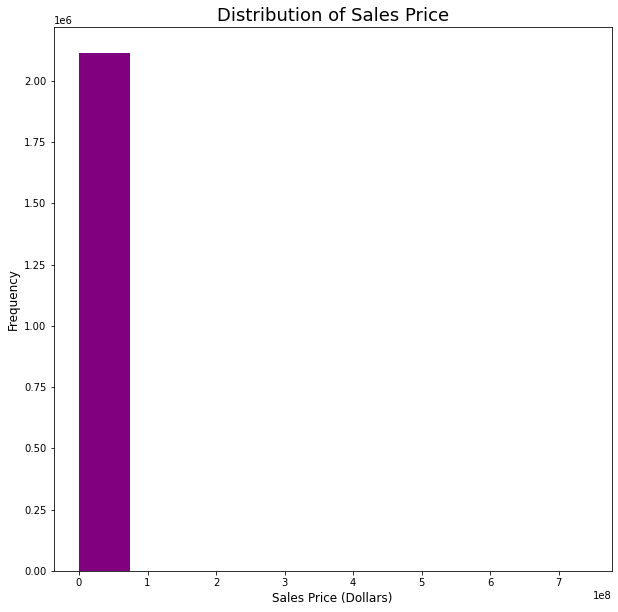